In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
import pandas as pd
from collections import Counter
import ast
import re
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/Go Emotion/go_emotions_dataset.csv')

In [3]:
print(df.shape)
df.head()

(211225, 31)


,id,text,example_very_unclear,admiration,amusement,anger,annoyance,approval,caring,confusion,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,eew5j0j,That game hurt.,False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,eemcysk,>sexuality shouldn’t be a grouping category I...,True,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ed2mah1,"You do right, if you don't care then fuck 'em!",False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,eeibobj,Man I love reddit.,False,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,eda6yn6,"[NAME] was nowhere near them, he was by the Fa...",False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [4]:
label_cols = df.columns[3:]  # ambil semua kolom mulai dari emosi pertama sampai terakhir

df['labels'] = df[label_cols].apply(lambda row: [label for label, val in row.items() if val == 1], axis=1)
df[['text', 'labels']].head()

,text,labels
0,That game hurt.,[sadness]
1,>sexuality shouldn’t be a grouping category I...,[]
2,"You do right, if you don't care then fuck 'em!",[neutral]
3,Man I love reddit.,[love]
4,"[NAME] was nowhere near them, he was by the Fa...",[neutral]


In [5]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    return text

df['clean_text'] = df['text'].apply(clean_text)
X = df['clean_text']

In [6]:
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(df['labels'])

In [7]:
X = df['clean_text']
y = mlb.fit_transform(df['labels'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

##**Modeling**

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report

In [9]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

### **Logistic Regression**

In [13]:
model = OneVsRestClassifier(LogisticRegression(max_iter=1000))
model.fit(X_train_tfidf, y_train)

OneVsRestClassifier(estimator=LogisticRegression(max_iter=1000))

In [14]:
y_pred = model.predict(X_test_tfidf)
print(classification_report(y_test, y_pred, target_names=mlb.classes_))

                precision    recall  f1-score   support

    admiration       0.68      0.27      0.38      3456
     amusement       0.60      0.29      0.40      1891
         anger       0.55      0.09      0.15      1628
     annoyance       0.32      0.02      0.03      2722
      approval       0.59      0.03      0.05      3418
        caring       0.49      0.04      0.08      1147
     confusion       0.55      0.04      0.07      1463
     curiosity       0.50      0.05      0.09      1941
        desire       0.47      0.07      0.12       758
disappointment       0.65      0.01      0.02      1671
   disapproval       0.45      0.03      0.05      2289
       disgust       0.57      0.07      0.12      1074
 embarrassment       0.59      0.03      0.05       502
    excitement       0.59      0.06      0.10      1121
          fear       0.61      0.14      0.22       625
     gratitude       0.90      0.70      0.79      2330
         grief       0.40      0.02      0.03  

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


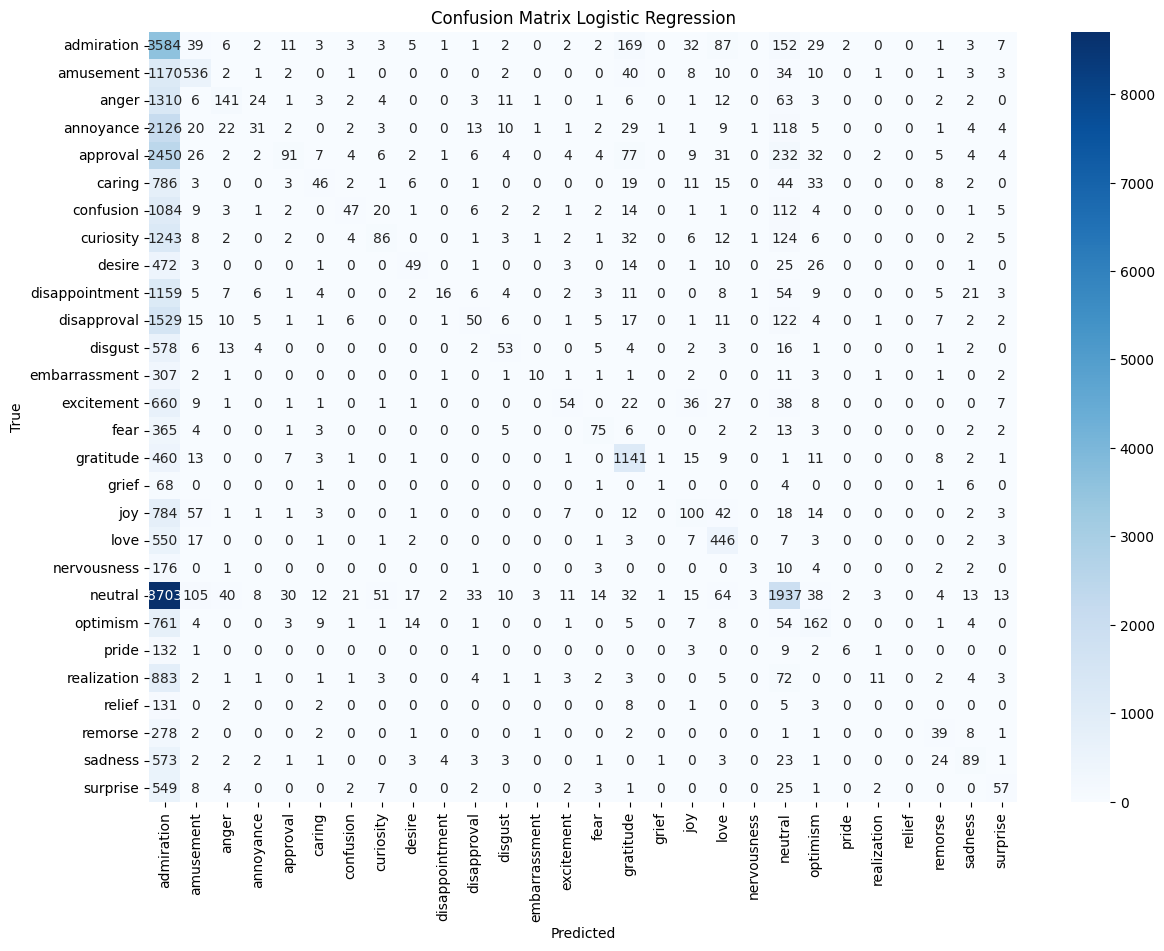

In [18]:
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

plt.figure(figsize=(14,10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=mlb.classes_, yticklabels=mlb.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Logistic Regression')
plt.show()

### **SVM**

In [ ]:
model_svm = OneVsRestClassifier(SVC(kernel='rbf', probability=True, max_iter=100))
model_svm.fit(X_train_tfidf, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

In [ ]:
y_pred_svm = model_svm.predict(X_test_tfidf)
print(classification_report(y_test, y_pred_svm, target_names=mlb.classes_))

In [ ]:
cm = confusion_matrix(y_test.argmax(axis=1), y_pred_svm.argmax(axis=1))

plt.figure(figsize=(14,10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=mlb.classes_, yticklabels=mlb.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix SVM')
plt.show()

### **Decision Tree**

In [ ]:
model_dt = OneVsRestClassifier(DecisionTreeClassifier())
model_dt.fit(X_train_tfidf, y_train)

In [ ]:
y_pred_dt = model_dt.predict(X_test_tfidf)
print(classification_report(y_test, y_pred_dt, target_names=mlb.classes_))

In [ ]:
cm = confusion_matrix(y_test.argmax(axis=1), y_pred_dt.argmax(axis=1))

plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=mlb.classes_, yticklabels=mlb.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Decision Tree')
plt.show()